# Model Building

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree



In [27]:
data = pd.read_csv('reviews_cleaned.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Sentiment_Label,review_length
0,293141,B008VQ01Y0,A1YYWOLUF6I4G1,"D. Kiser ""Dave Kiser""",56,56,5,1313193600,Perfect!,This one is well thought out - perfect in ever...,positive,1,189
1,234479,B000N17T4G,A89U02HSDZNVL,sob8864,5,9,3,1221436800,Tomatoes,A couple of cooking forums I belong to highly ...,neutral,0,55
2,172827,B000FAIRCS,A3N8RB943DMSH7,"Alisa Marie Fleming ""GoDairyFree.org""",1,1,4,1253836800,"Good flavor, small quantity","For the size of the box, I was surprised that ...",positive,1,68
3,303905,B004G5ZYOW,A3QX2CMKK413PL,Ray Obriskie,3,4,5,1336435200,THE BEST CHEW ON THE MARKET,I adore this chew. Two years ago I gave up ch...,positive,1,386
4,544685,B001P3PR54,AHNJYKSH03X4R,L. Reed,2,2,5,1281139200,Breath Refresher and Favorite Treat,My 9 yr old Jackie has always been a fussy eat...,positive,1,130


# Label Encoding

In [28]:
label_map = {"negative": 0, "neutral": 1, "positive": 2}

encoded_labels = [label_map[label] for label in data['Sentiment']]
y = encoded_labels
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(data['Summary'].values.astype('U')) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modeling

In [29]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train, y_train) 

LogisticRegression()

In [30]:
y_pred = model1.predict(X_test)

In [31]:

import joblib

# Save the LogisticRegression model
joblib.dump(model1, '/artifacts/logistic_model.pkl')

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.814
              precision    recall  f1-score   support

           0       0.68      0.38      0.48       144
           1       0.62      0.06      0.11        87
           2       0.83      0.98      0.90       769

    accuracy                           0.81      1000
   macro avg       0.71      0.47      0.50      1000
weighted avg       0.79      0.81      0.77      1000



# XGBoost Modeling

In [32]:
model2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model2.fit(X_train, y_train)


C:\Users\perei\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [00:25:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [33]:
y_pred = model2.predict(X_test)
joblib.dump(model2, '/artifacts/xgboost')
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_map.keys()))

Accuracy: 0.814
              precision    recall  f1-score   support

    negative       0.70      0.42      0.52       144
     neutral       0.28      0.06      0.10        87
    positive       0.84      0.97      0.90       769

    accuracy                           0.81      1000
   macro avg       0.60      0.48      0.51      1000
weighted avg       0.77      0.81      0.78      1000



# Random Forest

In [34]:
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
y_pred = model3.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_map.keys()))

Accuracy: 0.825
              precision    recall  f1-score   support

    negative       0.64      0.50      0.56       144
     neutral       0.40      0.07      0.12        87
    positive       0.86      0.97      0.91       769

    accuracy                           0.82      1000
   macro avg       0.63      0.51      0.53      1000
weighted avg       0.79      0.82      0.79      1000



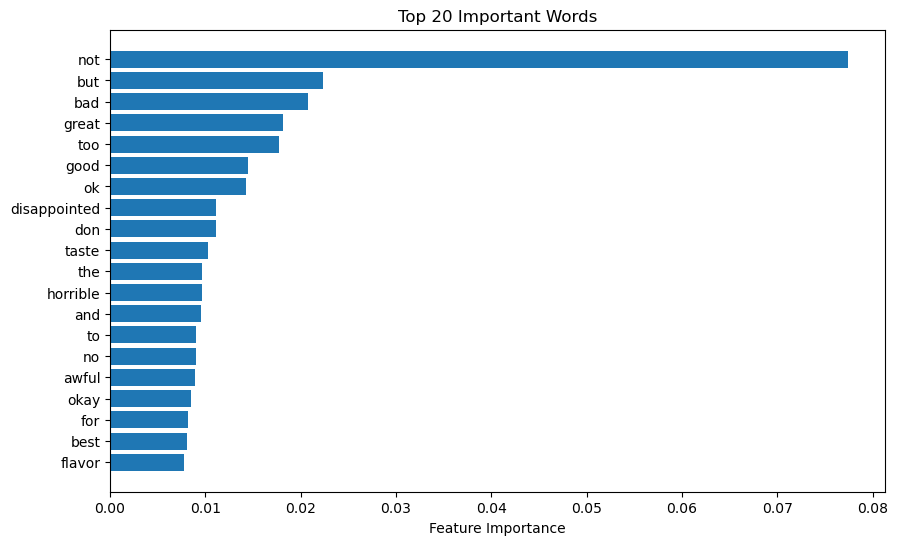

In [36]:
feature_names = vectorizer.get_feature_names_out()
importances = model3.feature_importances_

# Top 20 features
indices = np.argsort(importances)[-20:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Words")
plt.show()

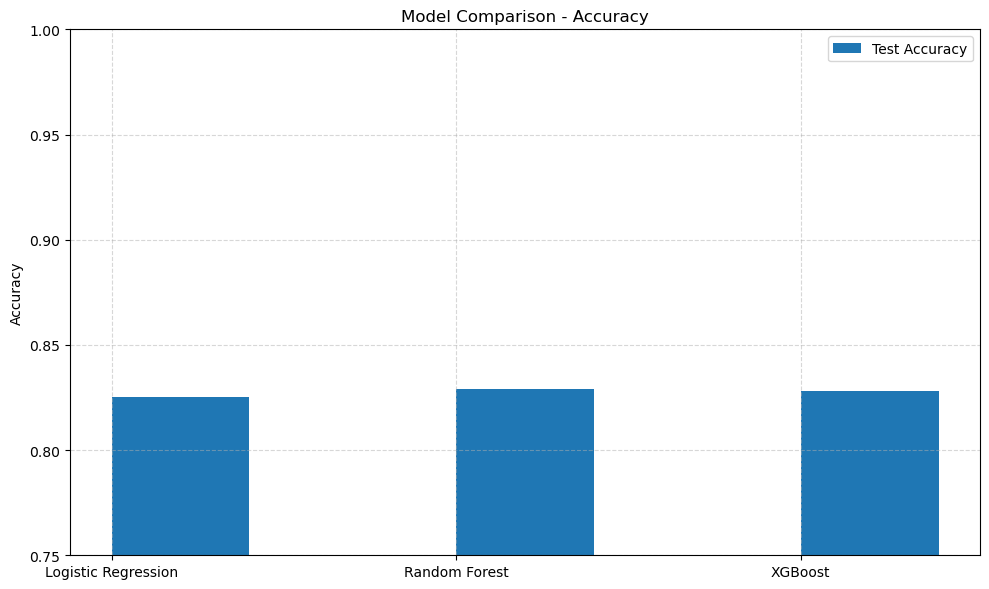

In [37]:
#Using Matplot.lib and Seaborn
models = ['Logistic Regression', 'Random Forest', 'XGBoost']

# Accuracy scores
val_accuracies = [0.7389, 0.7023, 0.7050]
test_accuracies = [0.825,  0.829, 0.828]

# Bar plot
x = range(len(models))
plt.figure(figsize=(10, 6))
plt.bar([i + 0.4 for i in x], test_accuracies, width=0.4, label='Test Accuracy', align='center')
plt.xticks([i + 0.2 for i in x], models)
plt.ylim(0.75, 1)
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\perei\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [00:26:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\perei\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [00:26:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\perei\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [00:26:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\perei\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [00:26:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

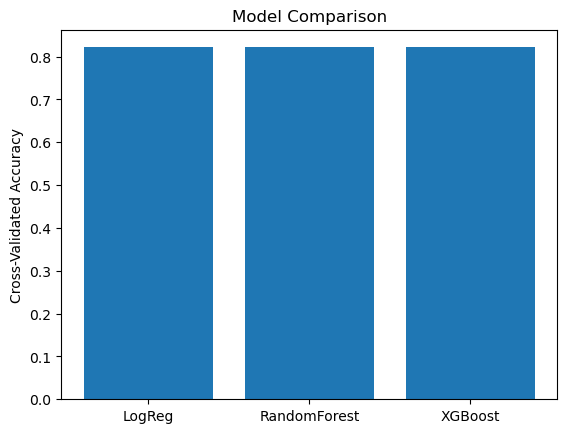

In [38]:
from sklearn.model_selection import cross_val_score

models = [model1, model2, model3]
labels = ['LogReg', 'RandomForest', 'XGBoost']
scores = [cross_val_score(m, X, y, cv=5).mean() for m in models]

plt.bar(labels, scores)
plt.ylabel("Cross-Validated Accuracy")
plt.title("Model Comparison")
plt.show()